#Projeto 2 - Modelo Não-Supervisionado
##Gabriel Schrader Vilas Boas, RA: 150981

Neste trabalho, foram selecionados 2 datasets para análise: o Iris Dataset, com 150 amostras, 4 features e 3 classes, e o Breast Cancer Dataset, com 569 amostras, 30 features e 2 classes. Para ser feita a análise sobre os datasets escolhidos, foi utilizado o modelo de rede neural não-supervisionado SOM (Soft Organization Maps), que será implementado de maneira fácil por uma biblioteca que já o implementa, chamada sklearn-som.

##Instalação Biblioteca com o SOM

In [1]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Bibliotecas Utilizadas

In [2]:
from sklearn_som.som import SOM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

##Iris Dataset

In [33]:
iris = datasets.load_iris()
iris_data = iris.data[:, :4]
iris_label = iris.target

###Aplicação do SOM

In [34]:
iris_som = SOM(m=3, n=1, dim=4, lr=0.6)
iris_som.fit(iris_data)
predictions = iris_som.predict(iris_data)

###Gráficos Comparando Distribuição Original x Predita pelo SOM

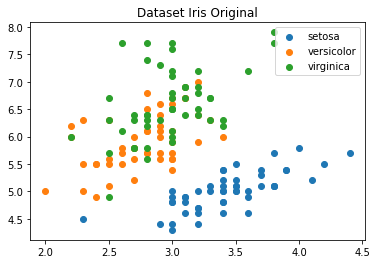

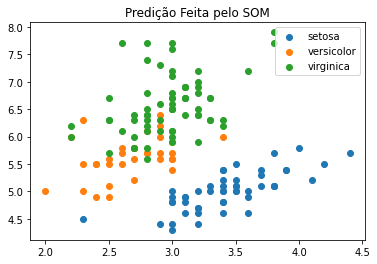

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset("iris")

for name, group in iris.groupby("species"):
    plt.scatter(iris["sepal_width"][group.index], iris["sepal_length"][group.index], label=name)

plt.title("Dataset Iris Original")
plt.legend()
plt.show()

iris_predicted = iris.copy()
iris_predicted["species"] = predictions
iris_predicted["species"].replace({0: "setosa", 1: "versicolor", 2: "virginica"}, inplace=True)

for name, group in iris_predicted.groupby("species"):
    plt.scatter(iris_predicted["sepal_width"][group.index], iris_predicted["sepal_length"][group.index], label=name)


plt.title("Predição Feita pelo SOM")
plt.legend()
plt.show()

###Padrões Observados
Como podemos ver acima, a predição feita pelo SOM, considerando as variáveis m=3, n=1, dim=4 e lr(learning rate)=0.6, foi relativamente bem próxima ao esperado para o dataset Iris original. É possível perceber que os clusters criados abrangem boa parte dos indivíduos que pertencem, de fato, a classe esperada. 

Além disso, é possível observar que, tratando a respeito dos outliers, o modelo não-supervisionado conseguiu agrupar corretamente alguns, porém outros, não. É perceptível que há mais indivíduos da classe versicolor presentes na parte de cima do gráfico na versão original(correta), enquanto que na predita parte desses indivíduos são classificados como virginica. 

###Homegeneidade dos Agrupamentos
Na predição feita pelo modelo SOM da biblioteca utilizada, podemos ver que, apesar de estarem relativamente bem homogêneos, os agrupamentos possuem alguns individuos que, supostamente, pertenceriam à outra classe, porém o algoritmo fez corretamente a classificação na classe esperada.

##Breast Cancer Dataset

In [6]:
breast_cancer = datasets.load_breast_cancer()
breast_cancer_data = breast_cancer.data[:, :30]
breast_cancer_label = breast_cancer.target

###Aplicação do SOM 

In [7]:
breast_cancer_som = SOM(m=2, n=1, dim=30)
breast_cancer_som.fit(breast_cancer_data)
predictions = breast_cancer_som.predict(breast_cancer_data)

###Gráficos Comparando Distribuição Original x Predita pelo SOM

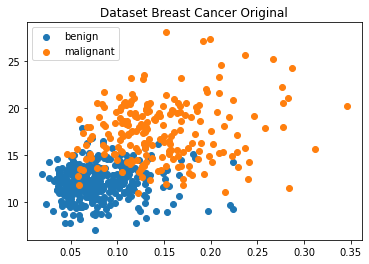

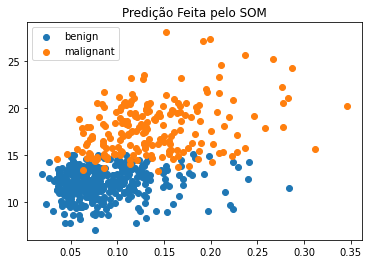

In [10]:
breast_cancer_pd = datasets.load_breast_cancer(as_frame=True)
breast_cancer = breast_cancer_pd.frame
breast_cancer.target.replace({0: "malignant", 1: "benign"}, inplace=True)

for name, group in breast_cancer.groupby('target'):
    plt.scatter(breast_cancer["mean compactness"][group.index], breast_cancer["mean radius"][group.index], label=name)

plt.title("Dataset Breast Cancer Original")
plt.legend()
plt.show()

breast_cancer_predicted = breast_cancer.copy()
breast_cancer_predicted.target = predictions
breast_cancer_predicted.target.replace({0: "malignant", 1: "benign"}, inplace=True)

for name, group in breast_cancer_predicted.groupby('target'):
    plt.scatter(breast_cancer_predicted["mean compactness"][group.index], breast_cancer_predicted["mean radius"][group.index], label=name)


plt.title("Predição Feita pelo SOM")
plt.legend()
plt.show()

###Padrões Observados
Diferente do dataset Iris, no dataset Breast Cancer houve menos casos de outliers sendo detectados na classe correta/esperada. Temos essa conclusão pois, graficamente, podemos observar que algumas amostras da classe "malignant" que estão se sobrepondo sobre o cluster "belign" não são classificadas corretamente na predição feita pelo modelo não-supervisionado.

Quanto aos clusters presentes nesse dataset, é possível ver que eles estão bem definidos, até mesmo separados, já que é praticamente possível traçar uma reta de separação entre os indivíduos de cada classe.

###Homogeneidade dos Agrupamentos
Para este dataset escolhido, é possível ver que os grupos são bem homogêneos, isto é, quase não há "mistura" de indivíduos de classes distintas no mesmo espaço da análise. Assim como dito no tópico anterior, os clusters ficaram bem definidos, e como tratam-se de apenas 2, tal definição e homogeneidade ficam ainda mais aparentes.